In [1]:
# Import of libraries
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re

C:\Users\ennei\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ennei\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\ennei\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Data cleaning

In [2]:
# Raw data loading
data = pd.read_csv('Dataset.csv', sep = ';')

In [3]:
# Let's have a look at it
data

Name  \
0     BMW 320 SERIE 3 TOURING E91 Touring 163ch pack...   
1                                     BMW X3 2.0d (E83)   
2                     BMW 525 SERIE 5 (05/1996-07/2000)   
3                 BMW 118 SERIE 1 E87 (05/2004-03/2007)   
4                                 BMW Pack PrÃ©fÃ©rence   
...                                                 ...   
7504                                  Alfa Romeo Giulia   
7505                                  Alfa Romeo Giulia   
7506                                  Alfa Romeo Giulia   
7507                                  Alfa Romeo Giulia   
7508                      Alfa Romeo Giulia 2.0 T Super   

                                                  Price          Km  \
0                                           EUR 2 500,-  540 000 km   
1                                           EUR 2 850,-  292 000 km   
2     EUR 3.490,-\n\n\n\n\nCe prix a ete en ligne pe...  246 000 km   
3                                           EUR 3 790,-  275 000 km   
4                                           EUR 4 490,-  230 000 km   
...                                                 ...         ...   
7504                                       EUR 19 500,-   35 000 km   
7505                                       EUR 19 500,-   35 000 km   
7506                                       EUR 19 500,-   35 000 km   
7507                                       EUR 19 500,-   35 000 km   
7508                                       EUR 19 800,-  102 000 km   

                                Etat     Date Carburant  Note  \
0     Occasion, Historique entretien  01/2006    Diesel   NaN   
1                           Occasion  09/2005    Diesel   NaN   
2                           Occasion  06/1998    Diesel   NaN   
3                           Occasion  01/2007    Diesel   NaN   
4                           Occasion  02/2021   Essence   NaN   
...                              ...      ...       ...   ...   
7504                        Occasion  07/2017    Diesel   NaN   
7505                        Occasion  07/2017    Diesel   NaN   
7506                        Occasion  07/2017    Diesel   NaN   
7507                        Occasion  07/2017    Diesel   NaN   
7508                        Occasion  08/2018   Essence   NaN   

      Number of reviews Accoudoir\n\n Assistant de démarrage en côte  ...  \
0                     0          True                          False  ...   
1                     0          True                           True  ...   
2                     0          True                          False  ...   
3                     0         False                          False  ...   
4                     0         False                          False  ...   
...                 ...           ...                            ...  ...   
7504                  0          True                          False  ...   
7505                  0          True                          False  ...   
7506                  0          True                          False  ...   
7507                  0          True                          False  ...   
7508                  0         False                           True  ...   

     Détecteur de lumière Détecteur de pluie  Régulateur de vitesse  \
0                    True               True                   True   
1                   False               True                   True   
2                   False              False                   True   
3                   False              False                  False   
4                   False              False                  False   
...                   ...                ...                    ...   
7504                 True               True                   True   
7505                 True               True                   True   
7506                 True               True                   True   
7507                 True               True                   True   
75

In [4]:
# Let's drop the rows with missing value
data.dropna(inplace = True)

In [5]:
# Change the names to english traductions
data.columns = [ 'Name','Price', 'Km', 'State', 'Date', 'Fuel', 'Notation',
       'Number of reviews', 'Armrest', 'Hill start assist',
       'Rear parking sensors',
       'Front parking sensors', 'Air conditioning',
       'Automatic air conditioning', 'Light detector',
       'Rain detector', 'Speed regulator',
       'Electric side mirrors', 'Electric seats',
       'Automatic Start/Stop', 'Navigation system', 'Electric windows',
       'Leather steering wheel', 'Multifunction steering wheel']

Conversion of price from string to float

In [6]:
print('Price before conversion')
print(data['Price'].head(5))

#We want the price to be only a number
regex = r'(\d+ \d+)'
extr = data['Price'].str.extract(regex, expand=False)
L = list(map(lambda x: str(x).replace(' ',''), extr)) #to remove the blank space between numbers

#We also want to convert the type to float
data.insert(0, 'Price_num', L) #We add a new column with formated price
data['Price_num'] = data['Price_num'].astype('float') #We convert the type to float
data.drop('Price', axis=1, inplace = True) #We remove the old non formated price
data = data.rename(columns={'Price_num':'Price'})

print("\n--------------\n")
print("Price after conversion")
print(data['Price'].head(5))

Price before conversion
5      EUR 4 990,-
17     EUR 7 990,-
19     EUR 8 650,-
22     EUR 9 250,-
28    EUR 10 790,-
Name: Price, dtype: object

--------------

Price after conversion
5      4990.0
17     7990.0
19     8650.0
22     9250.0
28    10790.0
Name: Price, dtype: float64


Conversion of fuel from string to a binary variable

In [7]:
#print(data['Fuel'].isna().sum()) #== 53
#data.dropna(subset = (['Fuel']) ,inplace=True)

data['Fuel'] = data['Fuel'].astype('string')
Carb = data['Fuel']

regex_dies = re.compile(r'Diesel*')

data['Diesel'] = np.zeros(len(data)) 
data['Essence'] = np.zeros(len(data))

for i in data.index:
    if regex_dies.search(Carb[i]):
        data['Diesel'].loc[i] = 1 #Diesel
    else:
        data['Essence'].loc[i] = 1 #Essence
        
# We drop the fuel column containing the data under text format
data.drop('Fuel', axis=1, inplace=True)

C:\Users\ennei\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Conversion of kilometers from string to float

In [8]:
print(data['Km'].head(5))
regex = r'(\d+ \d+)'
extr = data['Km'].str.extract(regex, expand=False)
L = list(map(lambda x: str(x).replace(' ',''), extr))


data.insert(2, 'Km_num', L) 
data['Km_num'] = data['Km_num'].astype('float') 
data.drop('Km', axis=1, inplace = True) 

print("\n--------------\n")
print("km after conversion")
print(data['Km_num'].head(5))

data.dropna(inplace = True)

5     999 999 km
17    150 000 km
19    197 000 km
22    176 750 km
28    115 950 km
Name: Km, dtype: object

--------------

km after conversion
5     999999.0
17    150000.0
19    197000.0
22    176750.0
28    115950.0
Name: Km_num, dtype: float64


The interesting time data is how old the car is, let's implement it.

In [9]:
# Drop the values with missing dates
data.drop(data[data['Date'] == '-'].index, inplace = True)
# Change to datetime format
data['Date'] = pd.to_datetime(data['Date'] , format='%m/%Y')

In [10]:
from datetime import datetime
data['Age'] = np.zeros(len(data))
for i in data.index:
    data['Age'][i] = (datetime.today() - data['Date'][i]).days
data.drop('Date', axis=1, inplace=True)

C:\Users\ennei\AppData\Local\Temp/ipykernel_14928/2732399086.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'][i] = (datetime.today() - data['Date'][i]).days


Extract the brand and the model from the name

In [11]:
regex = r'(\s[a-zA-Z]*\s)'
name = data['Name']

brand = []
model = []
for s in name:
    l = s.split(' ')
    if(l[0] == 'Alfa'):
        brand.append(l[0] + ' ' + l[1])
        model.append(l[2])
    else:
        brand.append(l[0])
        if(len(l) > 1):
            model.append(l[1])
        else:
            model.append('NaN')
            
data.insert(5, 'Brand', brand)
data.insert(6, 'Model', model)

data.drop('Name', axis=1, inplace = True) #We remove the old non formated Name

Encoding of 'State' to know if the car has had a recent maitenance and if it is a new one or not

In [12]:
# Let's add if the car has had a recent maintenance
data['Car maintenance'] = np.zeros(len(data))
for i in data.index:
    if (data['State'][i] == 'Occasion, Historique entretien' or data['State'][i] == 'Voiture récente, Historique entretien'):
        data['Car maintenance'][i] = 1

# Now that we have extracted this information, we can uniformize the type of car (Occasion, historic of maintenance becomes Occasion)
data = data.replace({'Occasion, Historique entretien' : 'Occasion', 'Voiture récente, Historique entretien' : 'Voiture récente' })
data['State'].unique()

one_hot_State = pd.get_dummies(data['State'])
data = data.join(one_hot_State)
data.drop('State', axis=1, inplace=True)

C:\Users\ennei\AppData\Local\Temp/ipykernel_14928/2940186162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Car maintenance'][i] = 1


Replace booleans by numerical values

In [13]:
data = data.replace({True: 1, False: 0})

In [14]:
data.describe()

Price         Km_num     Notation  Number of reviews  \
count    3013.000000    3013.000000  3013.000000        3013.000000   
mean    20510.176236   72140.589446     3.945735          -5.373050   
std     13860.917222   58127.609172     0.956105          12.126556   
min      1000.000000    1000.000000     1.000000         -78.000000   
25%     11490.000000   26893.000000     3.500000          -4.000000   
50%     18480.000000   62646.000000     4.000000          -2.000000   
75%     26990.000000  102962.000000     4.500000          -1.000000   
max    175000.000000  999999.000000     5.000000          -1.000000   

           Armrest  Hill start assist  Rear parking sensors  \
count  3013.000000        3013.000000           3013.000000   
mean      0.540989           0.506472              0.399934   
std       0.498400           0.500041              0.489966   
min       0.000000           0.000000              0.000000   
25%       0.000000           0.000000              0.000000   
50%       1.000000           1.000000              0.000000   
75%       1.000000           1.000000              1.000000   
max       1.000000           1.000000              1.000000   

       Front parking sensors  Air conditioning  Automatic air conditioning  \
count             3013.00000       3013.000000                 3013.000000   
mean                 0.12612          0.464321                    0.267839   
std                  0.33204          0.498808                    0.442907   
min                  0.00000          0.000000                    0.000000   
25%                  0.00000          0.000000                    0.000000   
50%                  0.00000          0.000000                    0.000000   
75%                  0.00000          1.000000                    1.000000   
max                  1.00000          1.000000                    1.000000   

       ...  Leather steering wheel  Multifunction steering wheel       Diesel  \
count  ...             3013.000000                   3013.000000  3013.000000   
mean   ...                0.380020                      0.664122     0.542980   
std    ...                0.485472                      0.472375     0.498232   
min    ...                0.000000                      0.000000     0.000000   
25%    ...                0.000000                      0.000000     0.000000   
50%    ...                0.000000                      1.000000     1.000000   
75%    ...                1.000000                      1.000000     1.000000   
max    ...                1.000000                      1.000000     1.000000   

           Essence           Age  Car maintenance      Ancêtre  Démonstration  \
count  3013.000000   3013.000000      3013.000000  3013.000000    3013.000000   
mean      0.457020   2269.970793         0.076336     0.000996       0.000664   
std       0.498232   2428.494511         0.265579     0.031544       0.025760   
min       0.000000     55.000000         0.000000     0.000000       0.000000   
25%       0.000000    969.000000         0.000000     0.000000       0.000000   
50%       0.000000   1607.000000         0.000000     0.000000       0.000000   
75%       1.000000   2734.000000         0.000000     0.000000       0.000000   
max       1.000000  44219.000000         1.000000     1.000000       1.000000   

          Occasion  Voiture récente  
count  3013.000000      3013.000000  
mean      0.997345         0.000996  
std       0.051468         0.031544  
min       0.000000         0.000000  
25%       1.000000         0.000000  
50%       1.000000         0.000000  
75%       1.000000         0.000000  
max       1.000000         1.000000  

[8 rows x 28 columns]

In [15]:
# The number of reviews is the opposite of what it should be, let's correct that
data['Number of reviews'] = data['Number of reviews'] * -1

In [16]:
data

Price    Km_num  Notation       Brand      Model  Number of reviews  \
5      4990.0  999999.0       3.5         BMW        745                  2   
17     7990.0  150000.0       5.0         BMW        116                  3   
19     8650.0  197000.0       5.0         BMW        116                  2   
22     9250.0  176750.0       5.0         BMW        120                  2   
28    10790.0  115950.0       5.0         BMW        120                  1   
...       ...       ...       ...         ...        ...                ...   
7490  17990.0   29085.0       3.0  Alfa Romeo  Giulietta                  1   
7491  17990.0   29896.0       3.0  Alfa Romeo  Giulietta                  1   
7492  17990.0   27900.0       3.0  Alfa Romeo  Giulietta                  1   
7493  17990.0   31134.0       3.0  Alfa Romeo  Giulietta                  2   
7500  19490.0   23378.0       4.5  Alfa Romeo  Giulietta                  1   

      Armrest  Hill start assist  Rear parking sensors  Front parking sensors  \
5           0                  0                     0                      0   
17          1                  0                     0                      0   
19          1                  0                     0                      0   
22          1                  0                     1                      0   
28          1                  0                     1                      0   
...       ...                ...                   ...                    ...   
7490        0                  0                     0                      0   
7491        1                  0                     1                      0   
7492        1                  0                     1                      0   
7493        1                  1                     0                      0   
7500        1                  1                     0                      0   

      ...  Leather steering wheel  Multifunction steering wheel  Diesel  \
5     ...                       0                             0     0.0   
17    ...                       0                             1     1.0   
19    ...                       0                             1     1.0   
22    ...                       1                             1     1.0   
28    ...                       1                             1     1.0   
...   ...                     ...                           ...     ...   
7490  ...                       0                             1     0.0   
7491  ...                       0                             1     0.0   
7492  ...                       0                             1     0.0   
7493  ...                       0                             1     1.0   
7500  ...                       0                             1     1.0   

      Essence     Age  Car maintenance  Ancêtre  Démonstration  Occasion  \
5         1.0  7148.0              0.0        0              0         1   
17        0.0  4348.0              0.0        0              0         1   
19        0.0  3311.0              0.0        0              0         1   
22        0.0  5047.0              0.0        0              0         1   
28        0.0  4164.0              0.0        0              0         1   
...       ...     ...              ...      ...            ...       ...   
7490      1.0  1365.0              0.0        0              0         1   
7491      1.0  1454.0              0.0        0              0         1   
7492      1.0  1426.0              0.0        0              0         1   
7493      0.0  1334.0              0.0        0              0         1   
7500      0.0   908.0              0.0        0              0         1   

      Voiture récente  
5                   0  
17                  0  
19                  0  
22                  0  
28                  0  
...               ...  
7490                0  
7491                0  
7492                0  
7493                0  
7500    

Our data is now clean and fully encoded since we want to use the brand and model to select subsets of the data. <br> Let's normalize it so that the coefficients of the regression be of the same order.

In [17]:
data.iloc[:,1:3] = (data.iloc[:,1:3] - data.iloc[:,1:3].min()) / (data.iloc[:,1:3].max() - data.iloc[:,1:3].min())
data.iloc[:,5:] = (data.iloc[:,5:] - data.iloc[:,5:].min()) / (data.iloc[:,5:].max() - data.iloc[:,5:].min())

In [18]:
data.describe()

Price       Km_num     Notation  Number of reviews  \
count    3013.000000  3013.000000  3013.000000        3013.000000   
mean    20510.176236     0.071212     0.736434           0.056793   
std     13860.917222     0.058186     0.239026           0.157488   
min      1000.000000     0.000000     0.000000           0.000000   
25%     11490.000000     0.025919     0.625000           0.000000   
50%     18480.000000     0.061708     0.750000           0.012987   
75%     26990.000000     0.102064     0.875000           0.038961   
max    175000.000000     1.000000     1.000000           1.000000   

           Armrest  Hill start assist  Rear parking sensors  \
count  3013.000000        3013.000000           3013.000000   
mean      0.540989           0.506472              0.399934   
std       0.498400           0.500041              0.489966   
min       0.000000           0.000000              0.000000   
25%       0.000000           0.000000              0.000000   
50%       1.000000           1.000000              0.000000   
75%       1.000000           1.000000              1.000000   
max       1.000000           1.000000              1.000000   

       Front parking sensors  Air conditioning  Automatic air conditioning  \
count             3013.00000       3013.000000                 3013.000000   
mean                 0.12612          0.464321                    0.267839   
std                  0.33204          0.498808                    0.442907   
min                  0.00000          0.000000                    0.000000   
25%                  0.00000          0.000000                    0.000000   
50%                  0.00000          0.000000                    0.000000   
75%                  0.00000          1.000000                    1.000000   
max                  1.00000          1.000000                    1.000000   

       ...  Leather steering wheel  Multifunction steering wheel       Diesel  \
count  ...             3013.000000                   3013.000000  3013.000000   
mean   ...                0.380020                      0.664122     0.542980   
std    ...                0.485472                      0.472375     0.498232   
min    ...                0.000000                      0.000000     0.000000   
25%    ...                0.000000                      0.000000     0.000000   
50%    ...                0.000000                      1.000000     1.000000   
75%    ...                1.000000                      1.000000     1.000000   
max    ...                1.000000                      1.000000     1.000000   

           Essence          Age  Car maintenance      Ancêtre  Démonstration  \
count  3013.000000  3013.000000      3013.000000  3013.000000    3013.000000   
mean      0.457020     0.050153         0.076336     0.000996       0.000664   
std       0.498232     0.054988         0.265579     0.031544       0.025760   
min       0.000000     0.000000         0.000000     0.000000       0.000000   
25%       0.000000     0.020696         0.000000     0.000000       0.000000   
50%       0.000000     0.035142         0.000000     0.000000       0.000000   
75%       1.000000     0.060660         0.000000     0.000000       0.000000   
max       1.000000     1.000000         1.000000     1.000000       1.000000   

          Occasion  Voiture récente  
count  3013.000000      3013.000000  
mean      0.997345         0.000996  
std       0.051468         0.031544  
min       0.000000         0.000000  
25%       1.000000         0.000000  
50%       1.000000         0.000000  
75%       1.000000         0.000000  
max       1.000000         1.000000  

[8 rows x 28 columns]

Now, let's generate a report to start interpreting !

In [19]:
pp.ProfileReport(data, title="Profiling Report", correlations = {"cramers": {"calculate": False}})

Summarize dataset:   0%|          | 0/43 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation map using Pearson's r on all the data : <br>
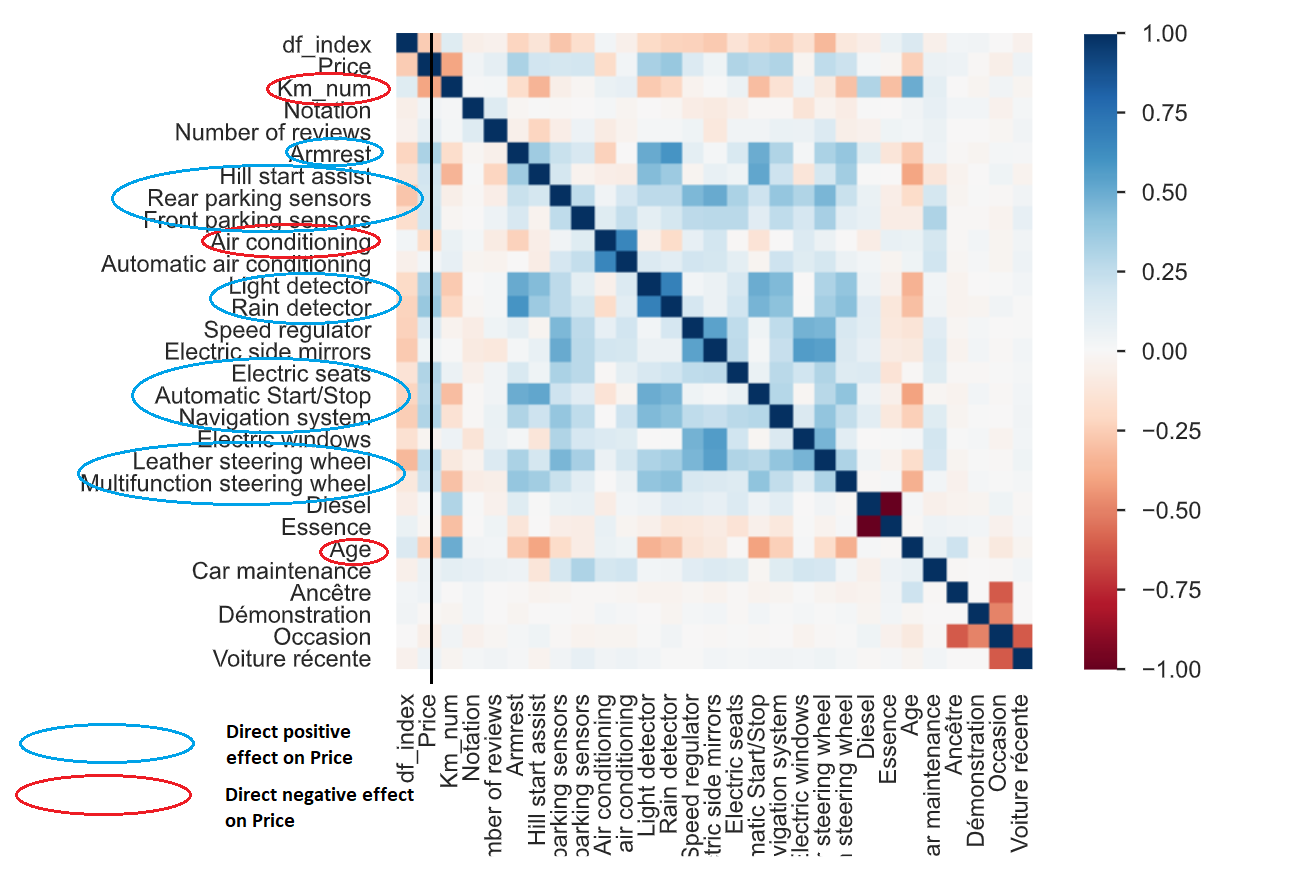

We can have a lot of information from that first analysis. <br><br> As we could have guessed, we observe that kilometers and age have a negative correlation with the price, since they are flagrants indicators of the state of the car. <br><br> We also observe a slightly negative correlation with air conditioning, which is not really logical and is probably due to the fact that we have an "automatic air conditioning" feature, an empirical characteristic of more expensive cars. Thus, we should probably drop this highly correlated column to have more logical results. <br><br> The features Speed regulator, Electric side mirrors, Electric windows, Diesel and Essence have a negligible correlation, probably because they are really common features and don't make a noticeable difference for the buyer. We can also notice that Diesel and Essence are totally correlated because there are only two possibilities of fuel. We should then merge the columns to a single one. <br><br> We observe that the 5 last features, which are determining the age of the car, are practically not correlated to the Price. By looking at their distribution, we can see that all the cars except 8 are 'Occasion' ('used car'). The features are thus really not usefull and we can drop them. <br><br> Finally, we can see that the notation and the number of reviews don't seem to have a lot of direct influence on the price. <br><br> Let's implement the changes proposed.

In [20]:
# Automatic air conditioning => Air conditioning
data.drop('Automatic air conditioning', axis=1, inplace = True)

In [21]:
# Put -1 for Essence where there was 0
data['Diesel'] = data['Diesel'].replace({0:-1})
                     
# Drop the Essence column
data.drop('Essence', axis=1, inplace = True)

# Rename the column
data = data.rename(columns={'Diesel':'Diesel1 Essence-1'})

In [22]:
# Drop the last 5 columns
data.drop(columns = ['Car maintenance', 'Ancêtre','Démonstration','Occasion','Voiture récente'], inplace = True)

Now, let's investigate the data

In [23]:
data.columns

Index(['Price', 'Km_num', 'Notation', 'Brand', 'Model', 'Number of reviews',
       'Armrest', 'Hill start assist', 'Rear parking sensors',
       'Front parking sensors', 'Air conditioning', 'Light detector',
       'Rain detector', 'Speed regulator', 'Electric side mirrors',
       'Electric seats', 'Automatic Start/Stop', 'Navigation system',
       'Electric windows', 'Leather steering wheel',
       'Multifunction steering wheel', 'Diesel1 Essence-1', 'Age'],
      dtype='object')

In [24]:
columns = ['Price', 'Km_num', 'Notation', 'Number of reviews',
       'Armrest', 'Hill start assist', 'Rear parking sensors',
       'Front parking sensors', 'Air conditioning', 'Light detector',
       'Rain detector', 'Speed regulator', 'Electric side mirrors',
       'Electric seats', 'Automatic Start/Stop', 'Navigation system',
       'Electric windows', 'Leather steering wheel',
       'Multifunction steering wheel', 'Diesel1 Essence-1', 'Age']

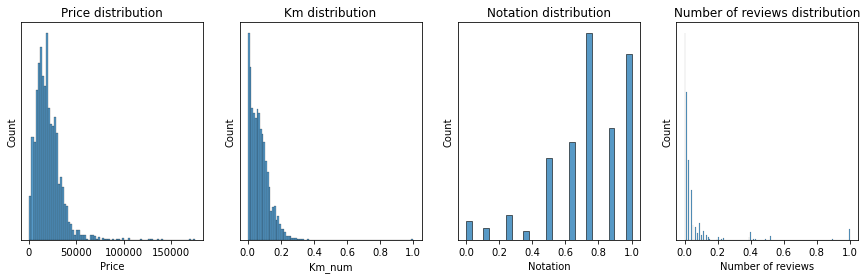

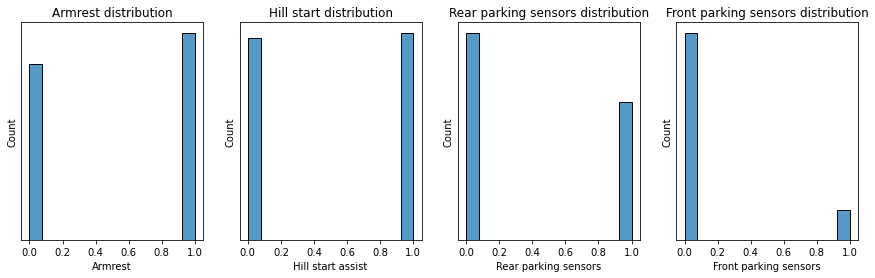

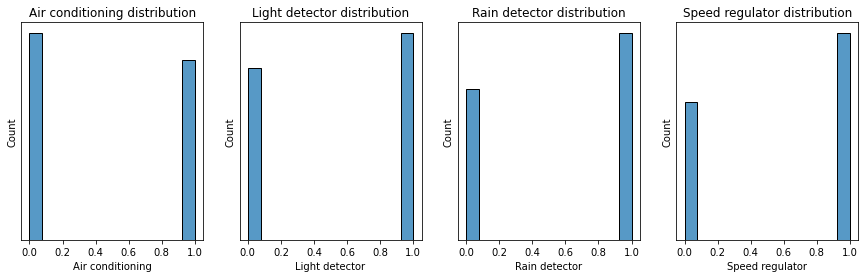

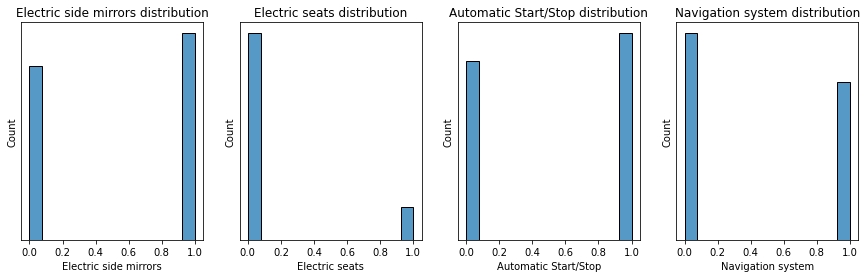

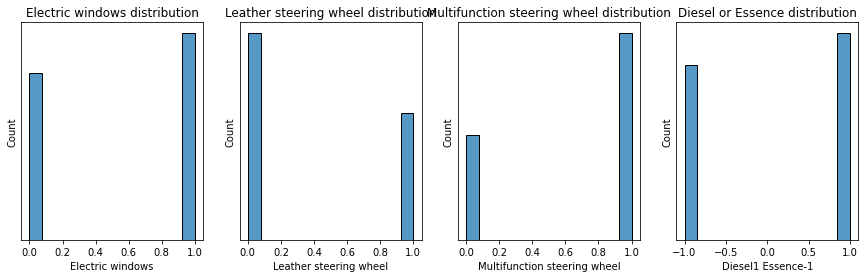

<AxesSubplot:title={'center':'Age distribution'}, xlabel='Age', ylabel='Count'>

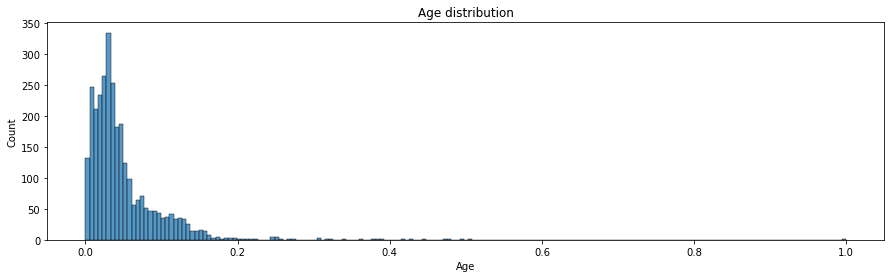

In [25]:
plt.rcParams["figure.figsize"] = (15, 4)

plt.subplot(141)
plt.title('Price distribution')
sns.histplot(data['Price']) 
plt.yticks([])

plt.subplot(142)
plt.title('Km distribution')
sns.histplot(data['Km_num'])
plt.yticks([])

plt.subplot(143)
plt.title('Notation distribution')
sns.histplot(data['Notation'])
plt.yticks([])

plt.subplot(144)
plt.title('Number of reviews distribution')
sns.histplot(data['Number of reviews'])
plt.yticks([])

plt.show()

plt.subplot(141)
plt.title('Armrest distribution')
sns.histplot(data['Armrest']) 
plt.yticks([])

plt.subplot(142)
plt.title('Hill start distribution')
sns.histplot(data['Hill start assist'])
plt.yticks([])

plt.subplot(143)
plt.title('Rear parking sensors distribution')
sns.histplot(data['Rear parking sensors'])
plt.yticks([])

plt.subplot(144)
plt.title('Front parking sensors distribution')
sns.histplot(data['Front parking sensors'])
plt.yticks([])

plt.show()

plt.subplot(141)
plt.title('Air conditioning distribution')
sns.histplot(data['Air conditioning']) 
plt.yticks([])

plt.subplot(142)
plt.title('Light detector distribution')
sns.histplot(data['Light detector'])
plt.yticks([])

plt.subplot(143)
plt.title('Rain detector distribution')
sns.histplot(data['Rain detector'])
plt.yticks([])

plt.subplot(144)
plt.title('Speed regulator distribution')
sns.histplot(data['Speed regulator'])
plt.yticks([])

plt.show()

plt.subplot(141)
plt.title('Electric side mirrors distribution')
sns.histplot(data['Electric side mirrors']) 
plt.yticks([])

plt.subplot(142)
plt.title('Electric seats distribution')
sns.histplot(data['Electric seats'])
plt.yticks([])

plt.subplot(143)
plt.title('Automatic Start/Stop distribution')
sns.histplot(data['Automatic Start/Stop'])
plt.yticks([])

plt.subplot(144)
plt.title('Navigation system distribution')
sns.histplot(data['Navigation system'])
plt.yticks([])

plt.show()

plt.subplot(141)
plt.title('Electric windows distribution')
sns.histplot(data['Electric windows']) 
plt.yticks([])

plt.subplot(142)
plt.title('Leather steering wheel distribution')
sns.histplot(data['Leather steering wheel'])
plt.yticks([])

plt.subplot(143)
plt.title('Multifunction steering wheel distribution')
sns.histplot(data['Multifunction steering wheel'])
plt.yticks([])

plt.subplot(144)
plt.title('Diesel or Essence distribution')
sns.histplot(data['Diesel1 Essence-1'])
plt.yticks([])

plt.show()
plt.title('Age distribution')
sns.histplot(data['Age'])

We can see that all non binary features except the notation are accumulated on the left. We can use a logaritmic transformation to make it better for a linear regression.

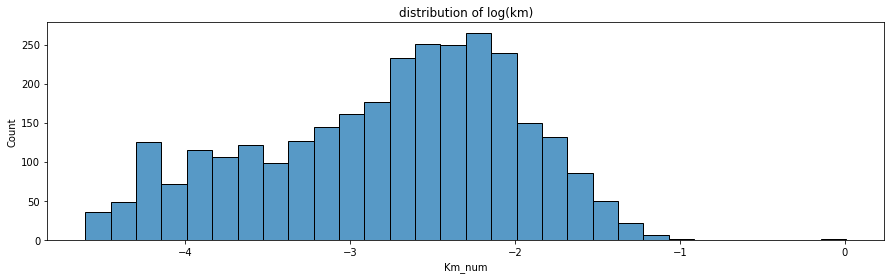

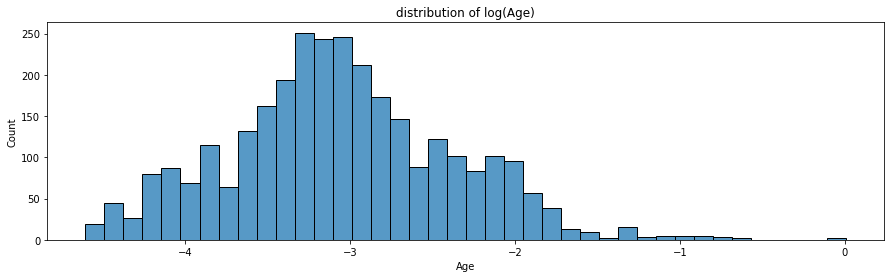

Text(0.5, 1.0, 'distribution of log(Price)')

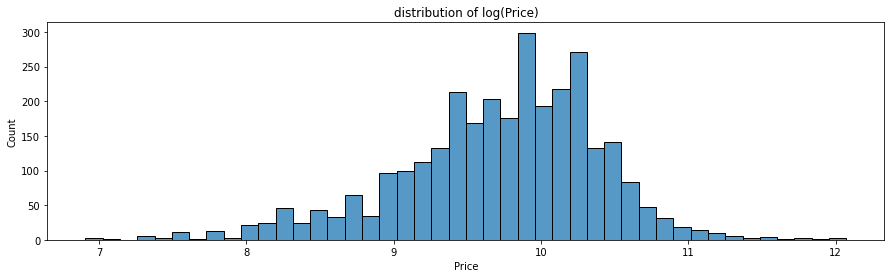

In [26]:
sns.histplot(np.log(data['Km_num']+0.01))
plt.title('distribution of log(km)')
plt.show()

sns.histplot(np.log(data['Age']+0.01))
plt.title('distribution of log(Age)')
plt.show()

sns.histplot(np.log(data['Price']+0.01))
plt.title('distribution of log(Price)')

In [27]:
# Apply the transformation
data['Km_num'], data['Age'], data['Price'] = np.log(data['Km_num']+0.01), np.log(data['Age']+0.01), np.log(data['Price']+0.01)

Let's do a first linear regression with all the data

In [28]:
price = data.Price
X = data[['Km_num', 'Notation', 'Number of reviews',
       'Armrest', 'Hill start assist', 'Rear parking sensors',
       'Front parking sensors', 'Air conditioning', 'Light detector',
       'Rain detector', 'Speed regulator', 'Electric side mirrors',
       'Electric seats', 'Automatic Start/Stop', 'Navigation system',
       'Electric windows', 'Leather steering wheel',
       'Multifunction steering wheel', 'Diesel1 Essence-1', 'Age']]
X['Constant'] = np.ones(len(X))

C:\Users\ennei\AppData\Local\Temp/ipykernel_14928/2971585392.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Constant'] = np.ones(len(X))


In [29]:
import statsmodels.api as sm
model = sm.OLS(price*10, X, hasconst = True) # The factor 10 is there only to have coefficient around 1
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     189.0
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:56:05   Log-Likelihood:                -8812.9
No. Observations:                3013   AIC:                         1.767e+04
Df Residuals:                    2992   BIC:                         1.779e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Km_num          

Du coup il reste à analyser les coeffs. Ce qu'il y a de bizarre c'est que les coefficients pour les vitres électriques et la climatisation sont négatifs, je me demande si pendant le scrap c'est pas l'info contraire qui a été extraite. <br><br> Ce qu'il y a dire sur les coeffs sinon c'est que les plus impactants sont les options rares, le nombre de reviews, l'âge et le kilométrage. Pour l'âge et le kilométrage c'est totalement logique vu que le prix d'une voiture est en partie indicé directement sur ça dans la vraie vie. Pour les options rares, je pense qu'on peut dire que c'est sûrement pas directement dû à l'option en soit mais au fait que si la voiture présente une option rare genre 'Electric seats' c'est que c'est une voiture plutôt haut de gamme donc son prix va être plus haut de base. Pour la notation et le nombre de reviews, c'est cool qu'on ait une influence positive on pourra s'en servir pour répondre à nos questions. Voilà à part ça, il reste juste à faire une analyse pour quelques marques, hésite pas si t'as des questions sur mon code ou ce que j'ai fait.

We are able to explain approximately 56% of the variation in the data, which is pretty good.<br><br>The regression suggests that the feature 'Multifunction steering wheel' can be dropped since P>|t| = 0.95. <br><br> The most impactful coefficients are :
-  Electric seats
-  The number of km <br>
...

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, price, train_size=0.8, test_size=0.2)

model = LinearRegression()
model.fit(X_train,y_train)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

predictions = model.predict(X_test)
predictions


array([ 9.44828533,  9.75682224,  9.37640717,  8.66182247,  9.99561743,
        9.64277755,  9.99560812,  9.54049256,  9.95780425,  9.35804849,
        9.16071381,  9.39740555,  9.20170258, 10.25717351,  9.81736313,
        9.48760786, 10.1428948 , 10.10739488,  9.31469734,  9.18949659,
        9.80912184,  9.24856455,  9.66051533, 10.42639918,  9.8761183 ,
        9.16186555,  9.83101969, 10.06573332,  9.09860203,  9.6539159 ,
        8.85169598, 10.01727801,  8.8747331 ,  9.91054836,  9.74570799,
        9.38052803,  9.59459259,  9.04764987,  8.73481149,  9.63712795,
        9.87197802, 10.38992618,  9.94759446, 10.94774872, 10.01298613,
       10.01036043,  9.69805938,  9.7809524 ,  9.32892459, 10.03383045,
        9.59296895,  9.21976544,  9.42420589, 10.14963997,  9.23120211,
       10.36775676,  9.42877753, 10.33100828,  9.96060796,  9.14518326,
        9.76658168,  9.47009995,  9.67712841,  9.20634712, 10.19064303,
       10.40839468,  9.33412282,  9.69697581,  8.63459366,  9.32

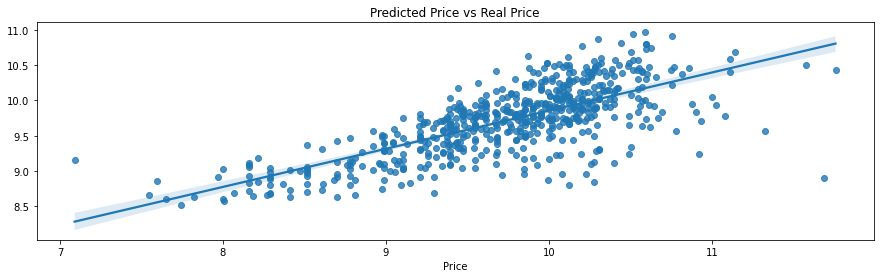

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x=y_test,y=predictions)
plt.title('Predicted Price vs Real Price')
plt.show() #We have to eliminate The really high prices which are outliers